# Agentic Retrieval-Augmented Generation System for Taiga Agile Project Data

# Stage 1 — Data Pre-processing

##Preprocessing

In [1]:
!pip install pandas numpy

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/RAG"


AMEP2324_EduConnect_tasks.csv	  AMEP2324_EduConnect_user_stories.csv
AMEP2324_EduConnect_tasks.gsheet


In [4]:
import os

print(os.path.exists('/content/drive/My Drive/RAG/AMEP2324_EduConnect_user_stories.csv'))
print(os.path.exists('/content/drive/My Drive/RAG/AMEP2324_EduConnect_tasks.csv'))


True
True


In [5]:
us_path = '/content/drive/My Drive/RAG/AMEP2324_EduConnect_user_stories.csv'
task_path = '/content/drive/My Drive/RAG/AMEP2324_EduConnect_tasks.csv'


In [6]:
with open(us_path, 'r', encoding='utf-8') as f:
    for _ in range(15):
        print(f.readline())


﻿project_id;epic_id;milestone_id;us_id;us_ref;us_subject;us_description;us_tags;us_created_date;us_due_date;us_due_date_reason;us_points;us_total_points;us_assigned_users;us_started_date;us_finished_date;us_client_requirement;us_sprint_order;us_status;40731;40732

1529072;220564;380700;5520185;12;Login d'usuaris;COM a estudiant/proveïdor/administrador VULL poder iniciar sessió al sistema PER gestionar els espais d'estudi (proveïdor) o gestionar l'alta de proveïdors i usuaris (administrador).;[];2024-02-25T13:13:23.672Z;;;{'9229632': 18384390, '9229633': 18384390, '9229634': 18384390, '9229635': 18384395};5,0;626629;;;False;5;New;High;"*   Interficie intiutiva i adaptable a la resolució.

*   Integritat de les dades.

*   Fer que el token d'inici de sessió expiri a la BDD"

1529072;220564;380700;5520181;11;Registre d'usuaris;COM a estudiant VULL poder registrar-me al sistema PER poder gestionar el meu perfil i els meus grups d'estudi.;[];2024-02-25T13:11:03.029Z;;;{'9229632': 18384390, 

In [7]:
import pandas as pd

us_df = pd.read_csv(
    us_path,
    sep=';',                 # Correct delimiter
    encoding='utf-8',        # Use 'utf-8-sig' if there are encoding issues
    quotechar='"',           # To handle multi-line text enclosed in quotes
    engine='python',         # Use Python engine to avoid C parser issues
    on_bad_lines='skip'      # Skip malformed lines if any exist
)


In [8]:
task_df = pd.read_csv(
    task_path,
    sep=';',                 # Correct delimiter
    encoding='utf-8',        # Use 'utf-8-sig' if there are encoding issues
    quotechar='"',           # To handle multi-line text enclosed in quotes
    engine='python',         # Use Python engine to avoid C parser issues
    on_bad_lines='skip'      # Skip malformed lines if any exist
)


In [9]:
us_df.head()


,project_id,epic_id,milestone_id,us_id,us_ref,us_subject,us_description,us_tags,us_created_date,us_due_date,...,us_points,us_total_points,us_assigned_users,us_started_date,us_finished_date,us_client_requirement,us_sprint_order,us_status,40731,40732
0,1529072,220564,380700.0,5520185,12,Login d'usuaris,COM a estudiant/proveïdor/administrador VULL p...,[],2024-02-25T13:13:23.672Z,NaN,...,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",626629.0,NaN,NaN,False,5,New,High,* Interficie intiutiva i adaptable a la reso...
1,1529072,220564,380700.0,5520181,11,Registre d'usuaris,COM a estudiant VULL poder registrar-me al sis...,[],2024-02-25T13:11:03.029Z,NaN,...,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",626629.0,NaN,NaN,False,6,New,High,* Interficie intiutiva i adaptable a la reso...
2,1529072,220568,386038.0,5520203,19,Donar d’alta espais,"COM a proveïdor, VULL donar d'alta espais PERQ...",[],2024-02-25T13:32:07.696Z,NaN,...,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",NaN,NaN,NaN,False,13,New,High,Genèric:\n\n* Que s'hagi testejat en diferen...
3,1529072,220566,380700.0,5520193,16,Editar grup d’estudi,"COM a estudiant amb rol de Creador, VULL edita...",[],2024-02-25T13:26:13.890Z,NaN,...,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",626036.0,NaN,NaN,False,13,New,Medium,Genèric:\n\n* Que s'hagi testejat en diferen...
4,1529072,220567,386038.0,5520196,17,Crear sessió,"COM a estudiant amb el rol de Creador, VULL po...",[],2024-02-25T13:28:47.176Z,NaN,...,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",NaN,NaN,NaN,False,4,New,High,* Disseny intuitiu\n* L'usuari no té que i...


In [10]:
task_df.head()


,project_id,milestone_id,us_id,task_id,task_ref,task_subject,task_tags,task_status,task_status_name,task_assigned_to,task_created_date,task_due_date,task_due_date_reason,task_finished_date,task_is_closed,22736,22737
0,1529072,380700,5531631.0,5446310,53,Format i revisió del codi,[],7637452,Closed,626036.0,2024-03-06T18:57:33.080Z,NaN,NaN,2024-03-18T21:26:51.589Z,True,1.0,0.5
1,1529072,380700,5520181.0,5447899,54,Disseny de l'interficie gràfica,[],7637452,Closed,626629.0,2024-03-06T19:15:11.111Z,NaN,NaN,2024-03-17T11:59:45.889Z,True,3.0,NaN
2,1529072,380700,5531631.0,5447902,55,Testeig del funcionament i creació dels jocs d...,[],7637452,Closed,626928.0,2024-03-06T19:15:42.450Z,NaN,NaN,2024-03-18T21:26:58.335Z,True,3.0,2.0
3,1529072,380700,5531631.0,5447906,56,Testeig en altres equips,[],7637452,Closed,626928.0,2024-03-06T19:15:58.279Z,NaN,NaN,2024-03-18T21:55:55.504Z,True,1.0,0.5
4,1529072,380700,5531631.0,5448067,58,Optimització,[],7637452,Closed,626036.0,2024-03-06T19:21:21.952Z,NaN,NaN,2024-03-18T21:56:00.220Z,True,1.0,0.5


In [11]:
# Check the shape (rows, columns) of each DataFrame
print("User Stories shape:", us_df.shape)
print("Tasks shape:", task_df.shape)

# Check the percentage of missing values in each column
print("Missing values in User Stories:")
print(us_df.isnull().mean().sort_values(ascending=False))

print("Missing values in Tasks:")
print(task_df.isnull().mean().sort_values(ascending=False))


User Stories shape: (54, 21)
Tasks shape: (325, 17)
Missing values in User Stories:
us_due_date_reason       1.000000
us_started_date          1.000000
us_finished_date         1.000000
us_due_date              1.000000
us_assigned_users        0.629630
40732                    0.277778
milestone_id             0.092593
40731                    0.055556
us_total_points          0.037037
us_ref                   0.000000
us_id                    0.000000
epic_id                  0.000000
project_id               0.000000
us_points                0.000000
us_description           0.000000
us_tags                  0.000000
us_created_date          0.000000
us_subject               0.000000
us_client_requirement    0.000000
us_status                0.000000
us_sprint_order          0.000000
dtype: float64
Missing values in Tasks:
task_due_date           1.000000
task_due_date_reason    1.000000
22737                   0.070769
us_id                   0.064615
task_finished_date      0.0215

In [12]:
!pip install deep-translator --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.1 MB/s eta 0:00:00


In [13]:
from deep_translator import GoogleTranslator
import pandas as pd
from IPython.display import display

# Safe translation function
def safe_translate(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text

### Translate all string columns in User Stories (us_df)
us_sample = us_df.head(3).copy()  # Take a sample of 3 rows
us_translated = us_sample.copy()

for col in us_sample.columns:
    if us_sample[col].dtype == "object":
        us_translated[col + "_en"] = us_sample[col].apply(safe_translate)

### Translate all string columns in Tasks (task_df)
task_sample = task_df.head(3).copy()
task_translated = task_sample.copy()

for col in task_sample.columns:
    if task_sample[col].dtype == "object":
        task_translated[col + "_en"] = task_sample[col].apply(safe_translate)

### Display Results
print("Translated Sample - User Stories:")
display(us_translated)

print("\n Translated Sample - Tasks:")
display(task_translated)


Translated Sample - User Stories:


,project_id,epic_id,milestone_id,us_id,us_ref,us_subject,us_description,us_tags,us_created_date,us_due_date,...,40732,us_subject_en,us_description_en,us_tags_en,us_created_date_en,us_points_en,us_total_points_en,us_status_en,40731_en,40732_en
0,1529072,220564,380700.0,5520185,12,Login d'usuaris,COM a estudiant/proveïdor/administrador VULL p...,[],2024-02-25T13:13:23.672Z,NaN,...,* Interficie intiutiva i adaptable a la reso...,User login,AS a student/provider/admin I WANT to be able ...,None,2024-02-25T13:13:23.672Z,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",New,High,* Intuitive interface and adaptable to the res...
1,1529072,220564,380700.0,5520181,11,Registre d'usuaris,COM a estudiant VULL poder registrar-me al sis...,[],2024-02-25T13:11:03.029Z,NaN,...,* Interficie intiutiva i adaptable a la reso...,User registration,AS A STUDENT I WANT TO BE ABLE TO REGISTER INT...,None,2024-02-25T13:11:03.029Z,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",New,High,* Intuitive interface and adaptable to the res...
2,1529072,220568,386038.0,5520203,19,Donar d’alta espais,"COM a proveïdor, VULL donar d'alta espais PERQ...",[],2024-02-25T13:32:07.696Z,NaN,...,Genèric:\n\n* Que s'hagi testejat en diferen...,Register spaces,"AS a provider, I WANT to register spaces SO th...",None,2024-02-25T13:32:07.696Z,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",New,High,Generic:\n\n* That it has been tested on diffe...



 Translated Sample - Tasks:


,project_id,milestone_id,us_id,task_id,task_ref,task_subject,task_tags,task_status,task_status_name,task_assigned_to,...,task_due_date_reason,task_finished_date,task_is_closed,22736,22737,task_subject_en,task_tags_en,task_status_name_en,task_created_date_en,task_finished_date_en
0,1529072,380700,5531631.0,5446310,53,Format i revisió del codi,[],7637452,Closed,626036.0,...,NaN,2024-03-18T21:26:51.589Z,True,1.0,0.5,Formatting and code review,None,Closed,2024-03-06T18:57:33.080Z,2024-03-18T21:26:51.589Z
1,1529072,380700,5520181.0,5447899,54,Disseny de l'interficie gràfica,[],7637452,Closed,626629.0,...,NaN,2024-03-17T11:59:45.889Z,True,3.0,NaN,Design of the graphic interface,None,Closed,2024-03-06T19:15:11.111Z,2024-03-17T11:59:45.889Z
2,1529072,380700,5531631.0,5447902,55,Testeig del funcionament i creació dels jocs d...,[],7637452,Closed,626928.0,...,NaN,2024-03-18T21:26:58.335Z,True,3.0,2.0,Testing of the operation and creation of test ...,None,Closed,2024-03-06T19:15:42.450Z,2024-03-18T21:26:58.335Z


In [14]:
from deep_translator import GoogleTranslator
import pandas as pd
from IPython.display import display

# Safe translation function
def safe_translate(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text  # Return original text if translation fails

### Translate all text columns in the full User Stories DataFrame
us_translated = us_df.copy()

for col in us_df.columns:
    if us_df[col].dtype == "object":  # Only translate string columns
        us_translated[col + "_en"] = us_df[col].apply(safe_translate)

### Translate all text columns in the full Tasks DataFrame
task_translated = task_df.copy()

for col in task_df.columns:
    if task_df[col].dtype == "object":  # Only translate string columns
        task_translated[col + "_en"] = task_df[col].apply(safe_translate)

### Display translated data samples
print("Translated User Stories (sample):")
display(us_translated.head())

print("\n Translated Tasks (sample):")
display(task_translated.head())


Translated User Stories (sample):


,project_id,epic_id,milestone_id,us_id,us_ref,us_subject,us_description,us_tags,us_created_date,us_due_date,...,40732,us_subject_en,us_description_en,us_tags_en,us_created_date_en,us_points_en,us_total_points_en,us_status_en,40731_en,40732_en
0,1529072,220564,380700.0,5520185,12,Login d'usuaris,COM a estudiant/proveïdor/administrador VULL p...,[],2024-02-25T13:13:23.672Z,NaN,...,* Interficie intiutiva i adaptable a la reso...,User login,AS a student/provider/admin I WANT to be able ...,None,2024-02-25T13:13:23.672Z,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",New,High,* Intuitive interface and adaptable to the res...
1,1529072,220564,380700.0,5520181,11,Registre d'usuaris,COM a estudiant VULL poder registrar-me al sis...,[],2024-02-25T13:11:03.029Z,NaN,...,* Interficie intiutiva i adaptable a la reso...,User registration,AS A STUDENT I WANT TO BE ABLE TO REGISTER INT...,None,2024-02-25T13:11:03.029Z,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",New,High,* Intuitive interface and adaptable to the res...
2,1529072,220568,386038.0,5520203,19,Donar d’alta espais,"COM a proveïdor, VULL donar d'alta espais PERQ...",[],2024-02-25T13:32:07.696Z,NaN,...,Genèric:\n\n* Que s'hagi testejat en diferen...,Register spaces,"AS a provider, I WANT to register spaces SO th...",None,2024-02-25T13:32:07.696Z,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",New,High,Generic:\n\n* That it has been tested on diffe...
3,1529072,220566,380700.0,5520193,16,Editar grup d’estudi,"COM a estudiant amb rol de Creador, VULL edita...",[],2024-02-25T13:26:13.890Z,NaN,...,Genèric:\n\n* Que s'hagi testejat en diferen...,Edit study group,"AS a student with the Creator role, I WANT to ...",None,2024-02-25T13:26:13.890Z,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",New,Medium,Generic:\n\n* That it has been tested on diffe...
4,1529072,220567,386038.0,5520196,17,Crear sessió,"COM a estudiant amb el rol de Creador, VULL po...",[],2024-02-25T13:28:47.176Z,NaN,...,* Disseny intuitiu\n* L'usuari no té que i...,Create session,"AS a student with the Creator role, I WANT to ...",None,2024-02-25T13:28:47.176Z,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",New,High,* Intuitive design\n* The user does not have t...



 Translated Tasks (sample):


,project_id,milestone_id,us_id,task_id,task_ref,task_subject,task_tags,task_status,task_status_name,task_assigned_to,...,task_due_date_reason,task_finished_date,task_is_closed,22736,22737,task_subject_en,task_tags_en,task_status_name_en,task_created_date_en,task_finished_date_en
0,1529072,380700,5531631.0,5446310,53,Format i revisió del codi,[],7637452,Closed,626036.0,...,NaN,2024-03-18T21:26:51.589Z,True,1.0,0.5,Formatting and code review,None,Closed,2024-03-06T18:57:33.080Z,2024-03-18T21:26:51.589Z
1,1529072,380700,5520181.0,5447899,54,Disseny de l'interficie gràfica,[],7637452,Closed,626629.0,...,NaN,2024-03-17T11:59:45.889Z,True,3.0,NaN,Design of the graphic interface,None,Closed,2024-03-06T19:15:11.111Z,2024-03-17T11:59:45.889Z
2,1529072,380700,5531631.0,5447902,55,Testeig del funcionament i creació dels jocs d...,[],7637452,Closed,626928.0,...,NaN,2024-03-18T21:26:58.335Z,True,3.0,2.0,Testing of the operation and creation of test ...,None,Closed,2024-03-06T19:15:42.450Z,2024-03-18T21:26:58.335Z
3,1529072,380700,5531631.0,5447906,56,Testeig en altres equips,[],7637452,Closed,626928.0,...,NaN,2024-03-18T21:55:55.504Z,True,1.0,0.5,Test on other teams,None,Closed,2024-03-06T19:15:58.279Z,2024-03-18T21:55:55.504Z
4,1529072,380700,5531631.0,5448067,58,Optimització,[],7637452,Closed,626036.0,...,NaN,2024-03-18T21:56:00.220Z,True,1.0,0.5,optimization,None,Closed,2024-03-06T19:21:21.952Z,2024-03-18T21:56:00.220Z


In [15]:
print("Columns in translated_us_df:")
print(us_translated.columns.tolist())

print("\n Columns in translated_task_df:")
print(task_translated.columns.tolist())


Columns in translated_us_df:
['project_id', 'epic_id', 'milestone_id', 'us_id', 'us_ref', 'us_subject', 'us_description', 'us_tags', 'us_created_date', 'us_due_date', 'us_due_date_reason', 'us_points', 'us_total_points', 'us_assigned_users', 'us_started_date', 'us_finished_date', 'us_client_requirement', 'us_sprint_order', 'us_status', '40731', '40732', 'us_subject_en', 'us_description_en', 'us_tags_en', 'us_created_date_en', 'us_points_en', 'us_total_points_en', 'us_status_en', '40731_en', '40732_en']

 Columns in translated_task_df:
['project_id', 'milestone_id', 'us_id', 'task_id', 'task_ref', 'task_subject', 'task_tags', 'task_status', 'task_status_name', 'task_assigned_to', 'task_created_date', 'task_due_date', 'task_due_date_reason', 'task_finished_date', 'task_is_closed', '22736', '22737', 'task_subject_en', 'task_tags_en', 'task_status_name_en', 'task_created_date_en', 'task_finished_date_en']


In [16]:
# For User Stories
base_cols_us = us_translated.columns.tolist()
cols_to_remove_us = [col for col in base_cols_us if col.endswith('_en') == False and col + '_en' in base_cols_us]
clean_us_df = us_translated.drop(columns=cols_to_remove_us)

# For Tasks
base_cols_task = task_translated.columns.tolist()
cols_to_remove_task = [col for col in base_cols_task if col.endswith('_en') == False and col + '_en' in base_cols_task]
clean_task_df = task_translated.drop(columns=cols_to_remove_task)

# Optional: reset column order (move translated cols to front)
clean_us_df = clean_us_df[[col for col in clean_us_df.columns if col.endswith('_en')] + [col for col in clean_us_df.columns if not col.endswith('_en')]]
clean_task_df = clean_task_df[[col for col in clean_task_df.columns if col.endswith('_en')] + [col for col in clean_task_df.columns if not col.endswith('_en')]]


In [17]:
clean_us_df.head(5)

,us_subject_en,us_description_en,us_tags_en,us_created_date_en,us_points_en,us_total_points_en,us_status_en,40731_en,40732_en,project_id,...,milestone_id,us_id,us_ref,us_due_date,us_due_date_reason,us_assigned_users,us_started_date,us_finished_date,us_client_requirement,us_sprint_order
0,User login,AS a student/provider/admin I WANT to be able ...,None,2024-02-25T13:13:23.672Z,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",New,High,* Intuitive interface and adaptable to the res...,1529072,...,380700.0,5520185,12,NaN,NaN,626629.0,NaN,NaN,False,5
1,User registration,AS A STUDENT I WANT TO BE ABLE TO REGISTER INT...,None,2024-02-25T13:11:03.029Z,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",New,High,* Intuitive interface and adaptable to the res...,1529072,...,380700.0,5520181,11,NaN,NaN,626629.0,NaN,NaN,False,6
2,Register spaces,"AS a provider, I WANT to register spaces SO th...",None,2024-02-25T13:32:07.696Z,"{'9229632': 18384390, '9229633': 18384390, '92...","5,0",New,High,Generic:\n\n* That it has been tested on diffe...,1529072,...,386038.0,5520203,19,NaN,NaN,NaN,NaN,NaN,False,13
3,Edit study group,"AS a student with the Creator role, I WANT to ...",None,2024-02-25T13:26:13.890Z,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",New,Medium,Generic:\n\n* That it has been tested on diffe...,1529072,...,380700.0,5520193,16,NaN,NaN,626036.0,NaN,NaN,False,13
4,Create session,"AS a student with the Creator role, I WANT to ...",None,2024-02-25T13:28:47.176Z,"{'9229632': 18384390, '9229633': 18384390, '92...","8,0",New,High,* Intuitive design\n* The user does not have t...,1529072,...,386038.0,5520196,17,NaN,NaN,NaN,NaN,NaN,False,4


In [18]:
clean_task_df.head(5)

,task_subject_en,task_tags_en,task_status_name_en,task_created_date_en,task_finished_date_en,project_id,milestone_id,us_id,task_id,task_ref,task_status,task_assigned_to,task_due_date,task_due_date_reason,task_is_closed,22736,22737
0,Formatting and code review,None,Closed,2024-03-06T18:57:33.080Z,2024-03-18T21:26:51.589Z,1529072,380700,5531631.0,5446310,53,7637452,626036.0,NaN,NaN,True,1.0,0.5
1,Design of the graphic interface,None,Closed,2024-03-06T19:15:11.111Z,2024-03-17T11:59:45.889Z,1529072,380700,5520181.0,5447899,54,7637452,626629.0,NaN,NaN,True,3.0,NaN
2,Testing of the operation and creation of test ...,None,Closed,2024-03-06T19:15:42.450Z,2024-03-18T21:26:58.335Z,1529072,380700,5531631.0,5447902,55,7637452,626928.0,NaN,NaN,True,3.0,2.0
3,Test on other teams,None,Closed,2024-03-06T19:15:58.279Z,2024-03-18T21:55:55.504Z,1529072,380700,5531631.0,5447906,56,7637452,626928.0,NaN,NaN,True,1.0,0.5
4,optimization,None,Closed,2024-03-06T19:21:21.952Z,2024-03-18T21:56:00.220Z,1529072,380700,5531631.0,5448067,58,7637452,626036.0,NaN,NaN,True,1.0,0.5


In [19]:
print(" Final columns in cleaned User Stories DataFrame:")
print(clean_us_df.columns.tolist())

print("\n Final columns in cleaned Tasks DataFrame:")
print(clean_task_df.columns.tolist())


 Final columns in cleaned User Stories DataFrame:
['us_subject_en', 'us_description_en', 'us_tags_en', 'us_created_date_en', 'us_points_en', 'us_total_points_en', 'us_status_en', '40731_en', '40732_en', 'project_id', 'epic_id', 'milestone_id', 'us_id', 'us_ref', 'us_due_date', 'us_due_date_reason', 'us_assigned_users', 'us_started_date', 'us_finished_date', 'us_client_requirement', 'us_sprint_order']

 Final columns in cleaned Tasks DataFrame:
['task_subject_en', 'task_tags_en', 'task_status_name_en', 'task_created_date_en', 'task_finished_date_en', 'project_id', 'milestone_id', 'us_id', 'task_id', 'task_ref', 'task_status', 'task_assigned_to', 'task_due_date', 'task_due_date_reason', 'task_is_closed', '22736', '22737']


In [20]:
# Check if the cleaned DataFrames contain any rows
print("clean_us_df has data:", not clean_us_df.empty)
print("clean_task_df has data:", not clean_task_df.empty)

# Optionally, print the shape (rows, columns) for additional context
print("clean_us_df shape:", clean_us_df.shape)
print("clean_task_df shape:", clean_task_df.shape)


clean_us_df has data: True
clean_task_df has data: True
clean_us_df shape: (54, 21)
clean_task_df shape: (325, 17)


In [21]:
# Merge tasks with their corresponding user stories using 'us_id'
merged_df = pd.merge(
    clean_task_df,
    clean_us_df,
    on='us_id',
    how='left',  # Keep all tasks even if a matching user story is not found
    suffixes=('_task', '_us')  # Add suffixes to distinguish overlapping columns
)

print("Merged DataFrame (Tasks + User Stories):")
merged_df.head()


Merged DataFrame (Tasks + User Stories):


,task_subject_en,task_tags_en,task_status_name_en,task_created_date_en,task_finished_date_en,project_id_task,milestone_id_task,us_id,task_id,task_ref,...,epic_id,milestone_id_us,us_ref,us_due_date,us_due_date_reason,us_assigned_users,us_started_date,us_finished_date,us_client_requirement,us_sprint_order
0,Formatting and code review,None,Closed,2024-03-06T18:57:33.080Z,2024-03-18T21:26:51.589Z,1529072,380700,5531631.0,5446310,53,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0
1,Design of the graphic interface,None,Closed,2024-03-06T19:15:11.111Z,2024-03-17T11:59:45.889Z,1529072,380700,5520181.0,5447899,54,...,220564.0,380700.0,11.0,NaN,NaN,626629.0,NaN,NaN,False,6.0
2,Testing of the operation and creation of test ...,None,Closed,2024-03-06T19:15:42.450Z,2024-03-18T21:26:58.335Z,1529072,380700,5531631.0,5447902,55,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0
3,Test on other teams,None,Closed,2024-03-06T19:15:58.279Z,2024-03-18T21:55:55.504Z,1529072,380700,5531631.0,5447906,56,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0
4,optimization,None,Closed,2024-03-06T19:21:21.952Z,2024-03-18T21:56:00.220Z,1529072,380700,5531631.0,5448067,58,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0


In [22]:
# Drop task-side versions of the shared columns
merged_df.drop(columns=['project_id_task', 'milestone_id_task'], inplace=True)

# Optionally rename 'project_id_us' and 'milestone_id_us' back to simple names
merged_df.rename(columns={
    'project_id_us': 'project_id',
    'milestone_id_us': 'milestone_id'
}, inplace=True)

# Display updated columns
print(" Final columns in merged_df:")
print(merged_df.columns.tolist())


 Final columns in merged_df:
['task_subject_en', 'task_tags_en', 'task_status_name_en', 'task_created_date_en', 'task_finished_date_en', 'us_id', 'task_id', 'task_ref', 'task_status', 'task_assigned_to', 'task_due_date', 'task_due_date_reason', 'task_is_closed', '22736', '22737', 'us_subject_en', 'us_description_en', 'us_tags_en', 'us_created_date_en', 'us_points_en', 'us_total_points_en', 'us_status_en', '40731_en', '40732_en', 'project_id', 'epic_id', 'milestone_id', 'us_ref', 'us_due_date', 'us_due_date_reason', 'us_assigned_users', 'us_started_date', 'us_finished_date', 'us_client_requirement', 'us_sprint_order']


In [23]:
print(" Columns in merged_df:")
print(merged_df.columns.tolist())


 Columns in merged_df:
['task_subject_en', 'task_tags_en', 'task_status_name_en', 'task_created_date_en', 'task_finished_date_en', 'us_id', 'task_id', 'task_ref', 'task_status', 'task_assigned_to', 'task_due_date', 'task_due_date_reason', 'task_is_closed', '22736', '22737', 'us_subject_en', 'us_description_en', 'us_tags_en', 'us_created_date_en', 'us_points_en', 'us_total_points_en', 'us_status_en', '40731_en', '40732_en', 'project_id', 'epic_id', 'milestone_id', 'us_ref', 'us_due_date', 'us_due_date_reason', 'us_assigned_users', 'us_started_date', 'us_finished_date', 'us_client_requirement', 'us_sprint_order']


In [24]:
merged_df.head(5)

,task_subject_en,task_tags_en,task_status_name_en,task_created_date_en,task_finished_date_en,us_id,task_id,task_ref,task_status,task_assigned_to,...,epic_id,milestone_id,us_ref,us_due_date,us_due_date_reason,us_assigned_users,us_started_date,us_finished_date,us_client_requirement,us_sprint_order
0,Formatting and code review,None,Closed,2024-03-06T18:57:33.080Z,2024-03-18T21:26:51.589Z,5531631.0,5446310,53,7637452,626036.0,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0
1,Design of the graphic interface,None,Closed,2024-03-06T19:15:11.111Z,2024-03-17T11:59:45.889Z,5520181.0,5447899,54,7637452,626629.0,...,220564.0,380700.0,11.0,NaN,NaN,626629.0,NaN,NaN,False,6.0
2,Testing of the operation and creation of test ...,None,Closed,2024-03-06T19:15:42.450Z,2024-03-18T21:26:58.335Z,5531631.0,5447902,55,7637452,626928.0,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0
3,Test on other teams,None,Closed,2024-03-06T19:15:58.279Z,2024-03-18T21:55:55.504Z,5531631.0,5447906,56,7637452,626928.0,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0
4,optimization,None,Closed,2024-03-06T19:21:21.952Z,2024-03-18T21:56:00.220Z,5531631.0,5448067,58,7637452,626036.0,...,220566.0,380700.0,36.0,NaN,NaN,626036.0,NaN,NaN,False,12.0


In [25]:
# Rename encoded columns to meaningful names


merged_df = merged_df.rename(columns={
    "22736": "estimated_effort",
    "22737": "actual_effort",
    "40731_en": "priority",
    "40732_en": "acceptance_criteria"
})


##Constructing a Comprehensive Document for Each User Story with Tasks and Metadata



In this section, for each user story in the dataset, all relevant details—including the user story text, description, priority, acceptance criteria, and associated tasks—are extracted and combined into a structured document. Additionally, related metadata such as effort estimations and project identifiers are attached. These compiled documents are then stored in a DataFrame to be used later for indexing or retrieval in the RAG pipeline.



##Transforming Each Row into LangChain Document Objects



This step converts each row of the DataFrame—containing the full user story text along with tasks and metadata—into a Document object from LangChain. The page_content holds the main text, while metadata stores the user story ID. This structure is essential for preparing the data to be indexed into the vector store in the next phase.



In [26]:
grouped_docs = []

for us_id, group in merged_df.groupby("us_id"):

    us = group.iloc[0]

    # ---- User Story section ----
    story_text = f"User Story: {us.get('us_subject_en', 'N/A')}"
    description_text = f"Description: {us.get('us_description_en', 'N/A')}"
    status_text = f"Status: {us.get('us_status_en', 'N/A')}"
    points_text = f"Story Points: {us.get('us_points_en', 'N/A')}"
    total_points_text = f"Total Story Points: {us.get('us_total_points_en', 'N/A')}"
    sprint_text = f"Sprint Order: {us.get('us_sprint_order', 'N/A')}"
    created_text = f"Created: {us.get('us_created_date_en', 'N/A')}"
    finished_text = f"Finished: {us.get('us_finished_date', 'N/A')}"
    assigned_users_text = f"Assigned Users: {us.get('us_assigned_users', 'N/A')}"

    # ---- Tasks section ----
    task_lines = []

    for _, row in group.iterrows():

        task_name = row.get("task_subject_en") or "Unknown task"

        task_status = row.get("task_status_name_en", "N/A")
        assignee = row.get("task_assigned_to", "N/A")

        created = row.get("task_created_date_en", "N/A")
        finished = row.get("task_finished_date_en", "N/A")
        due = row.get("task_due_date", "N/A")

        est = row.get("estimated_effort")
        act = row.get("actual_effort")

        est = est if pd.notna(est) else "N/A"
        act = act if pd.notna(act) else "N/A"

        task_lines.append(
            f"- Task: {task_name}\n"
            f"  Status: {task_status}\n"
            f"  Assignee: {assignee}\n"
            f"  Created: {created}\n"
            f"  Due: {due}\n"
            f"  Finished: {finished}\n"
            f"  Estimated effort: {est}\n"
            f"  Actual effort: {act}"
        )

    task_text = "Tasks:\n" + "\n".join(task_lines)

    # ---- Full document ----
    full_doc = "\n".join([
        story_text,
        description_text,
        status_text,
        points_text,
        total_points_text,
        sprint_text,
        created_text,
        finished_text,
        assigned_users_text,
        "",
        task_text
    ])

    grouped_docs.append({
        "us_id": us_id,
        "document": full_doc,
        "project_id": us.get("project_id"),
        "epic_id": us.get("epic_id"),
        "milestone_id": us.get("milestone_id"),
    })


document_df = pd.DataFrame(grouped_docs)


In [27]:
from langchain_core.documents import Document

documents = []

for idx, row in document_df.iterrows():

    user_story = row['document']

    # metadata
    metadata = {
        "us_id": row["us_id"],
        "source": "taiga",
        "doc_type": "user_story"
    }

    doc = Document(
        page_content=user_story,
        metadata=metadata
    )

    documents.append(doc)


for i, doc in enumerate(documents[:3]):

    print(f"\n Document {i+1}")
    print(" Content:\n", doc.page_content)
    print(" Metadata:", doc.metadata)



 Document 1
 Content:
 User Story: User registration
Description: AS A STUDENT I WANT TO BE ABLE TO REGISTER INTO THE SYSTEM TO MANAGE MY PROFILE AND MY STUDY GROUPS.
Status: New
Story Points: {'9229632': 18384390, '9229633': 18384390, '9229634': 18384390, '9229635': 18384396}
Total Story Points: 8,0
Sprint Order: 6.0
Created: 2024-02-25T13:11:03.029Z
Finished: nan
Assigned Users: 626629.0

Tasks:
- Task: Design of the graphic interface
  Status: Closed
  Assignee: 626629.0
  Created: 2024-03-06T19:15:11.111Z
  Due: nan
  Finished: 2024-03-17T11:59:45.889Z
  Estimated effort: 3.0
  Actual effort: N/A
- Task: Creation of BBDD tables
  Status: Closed
  Assignee: 626629.0
  Created: 2024-03-06T19:22:03.749Z
  Due: nan
  Finished: 2024-03-15T17:28:58.935Z
  Estimated effort: 1.0
  Actual effort: N/A
- Task: Implementation of the C++ code for user registration
  Status: Closed
  Assignee: 626897.0
  Created: 2024-03-06T19:50:55.970Z
  Due: nan
  Finished: 2024-03-17T12:55:33.181Z
  Estimat

# Stage 2 — Agentic RAG Framework

## Setup


In [28]:
# Install required packages for LangGraph Agentic RAG (Taiga Scrum Master use case)

!pip install -U  --quiet langgraph "langchain[openai]" langchain-community langchain-text-splitters


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [29]:
import getpass
import os

# Set OpenAI API Key (used by LangGraph + LangChain)
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OPENAI_API_KEY: ")


Enter your OPENAI_API_KEY: ··········


## 1. Preprocess documents

1. Fetch documents to use in our RAG system.

In [30]:
documents[0].page_content.strip()[:1000]


"User Story: User registration\nDescription: AS A STUDENT I WANT TO BE ABLE TO REGISTER INTO THE SYSTEM TO MANAGE MY PROFILE AND MY STUDY GROUPS.\nStatus: New\nStory Points: {'9229632': 18384390, '9229633': 18384390, '9229634': 18384390, '9229635': 18384396}\nTotal Story Points: 8,0\nSprint Order: 6.0\nCreated: 2024-02-25T13:11:03.029Z\nFinished: nan\nAssigned Users: 626629.0\n\nTasks:\n- Task: Design of the graphic interface\n  Status: Closed\n  Assignee: 626629.0\n  Created: 2024-03-06T19:15:11.111Z\n  Due: nan\n  Finished: 2024-03-17T11:59:45.889Z\n  Estimated effort: 3.0\n  Actual effort: N/A\n- Task: Creation of BBDD tables\n  Status: Closed\n  Assignee: 626629.0\n  Created: 2024-03-06T19:22:03.749Z\n  Due: nan\n  Finished: 2024-03-15T17:28:58.935Z\n  Estimated effort: 1.0\n  Actual effort: N/A\n- Task: Implementation of the C++ code for user registration\n  Status: Closed\n  Assignee: 626897.0\n  Created: 2024-03-06T19:50:55.970Z\n  Due: nan\n  Finished: 2024-03-17T12:55:33.181Z\

2. Split user story documents into smaller chunks for embedding and indexing.
This improves semantic retrieval performance while preserving task-level context.

In [31]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

docs_list = documents

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=2500,     # good for user stories
    chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)


In [32]:
doc_splits[0].page_content.strip()


"User Story: User registration\nDescription: AS A STUDENT I WANT TO BE ABLE TO REGISTER INTO THE SYSTEM TO MANAGE MY PROFILE AND MY STUDY GROUPS.\nStatus: New\nStory Points: {'9229632': 18384390, '9229633': 18384390, '9229634': 18384390, '9229635': 18384396}\nTotal Story Points: 8,0\nSprint Order: 6.0\nCreated: 2024-02-25T13:11:03.029Z\nFinished: nan\nAssigned Users: 626629.0\n\nTasks:\n- Task: Design of the graphic interface\n  Status: Closed\n  Assignee: 626629.0\n  Created: 2024-03-06T19:15:11.111Z\n  Due: nan\n  Finished: 2024-03-17T11:59:45.889Z\n  Estimated effort: 3.0\n  Actual effort: N/A\n- Task: Creation of BBDD tables\n  Status: Closed\n  Assignee: 626629.0\n  Created: 2024-03-06T19:22:03.749Z\n  Due: nan\n  Finished: 2024-03-15T17:28:58.935Z\n  Estimated effort: 1.0\n  Actual effort: N/A\n- Task: Implementation of the C++ code for user registration\n  Status: Closed\n  Assignee: 626897.0\n  Created: 2024-03-06T19:50:55.970Z\n  Due: nan\n  Finished: 2024-03-17T12:55:33.181Z\

##2. Create a retriever tool

1. Index document chunks into a vector store using embeddings
to enable semantic search and retrieval of relevant Agile data.

In [33]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings

vectorstore = InMemoryVectorStore.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)

retriever = vectorstore.as_retriever(
    search_kwargs={"k": 8}
)


2. Define a tool that enables the agent to retrieve relevant Taiga user stories from the vector store using semantic search.

In [34]:
from langchain.tools import tool

@tool
def retrieve_user_stories(query: str) -> str:
    """Search and return relevant Taiga user stories and their tasks."""
    docs = retriever.invoke(query)
    return "\n\n".join(doc.page_content for doc in docs)

retriever_tool = retrieve_user_stories


Test the tool:


In [35]:
retriever_tool.invoke({"query": "user registration"})


"User Story: User registration\nDescription: AS A STUDENT I WANT TO BE ABLE TO REGISTER INTO THE SYSTEM TO MANAGE MY PROFILE AND MY STUDY GROUPS.\nStatus: New\nStory Points: {'9229632': 18384390, '9229633': 18384390, '9229634': 18384390, '9229635': 18384396}\nTotal Story Points: 8,0\nSprint Order: 6.0\nCreated: 2024-02-25T13:11:03.029Z\nFinished: nan\nAssigned Users: 626629.0\n\nTasks:\n- Task: Design of the graphic interface\n  Status: Closed\n  Assignee: 626629.0\n  Created: 2024-03-06T19:15:11.111Z\n  Due: nan\n  Finished: 2024-03-17T11:59:45.889Z\n  Estimated effort: 3.0\n  Actual effort: N/A\n- Task: Creation of BBDD tables\n  Status: Closed\n  Assignee: 626629.0\n  Created: 2024-03-06T19:22:03.749Z\n  Due: nan\n  Finished: 2024-03-15T17:28:58.935Z\n  Estimated effort: 1.0\n  Actual effort: N/A\n- Task: Implementation of the C++ code for user registration\n  Status: Closed\n  Assignee: 626897.0\n  Created: 2024-03-06T19:50:55.970Z\n  Due: nan\n  Finished: 2024-03-17T12:55:33.181Z\

## 3. Generate query


Decide: retrieve or respond. The LLM sees the chat history (MessagesState) and,
guided by a system prompt, either calls the Taiga retriever tool or answers directly.

In [36]:
from langgraph.graph import MessagesState
from langchain.chat_models import init_chat_model
from langchain_core.messages import SystemMessage

response_model = init_chat_model("gpt-4.1", temperature=0)

SYSTEM_PROMPT = """
You are an Agile assistant answering questions about Taiga project data.

You have access to a tool that retrieves user stories and tasks.

Use the tool when:

- the user asks about a specific user story
- the user asks about tasks, effort, assignees, sprint, story points
- the answer is not fully available in the conversation memory
- the question introduces new entities

Do NOT use the tool when:

- the question clearly refers to the immediately previous answer
- and all necessary information is already present in the conversation

Always prefer grounded answers based on retrieved context when uncertain.
"""

def generate_query_or_respond(state: MessagesState):

    messages = state["messages"]

    messages_with_system = [
        SystemMessage(content=SYSTEM_PROMPT),
        *messages
    ]

    msg = response_model.bind_tools(
        [retriever_tool]
    ).invoke(messages_with_system)

    return {"messages": [msg]}

Test

In [37]:
test_input = {
    "messages": [
        {"role": "user", "content": "hello!"}
    ]
}

generate_query_or_respond(test_input)["messages"][-1].pretty_print()


================================== Ai Message ==================================

Hello! How can I assist you with your Taiga project data today?


Test

In [38]:
test_input = {
    "messages": [
        {"role": "user", "content": "Show me the tasks for user registration"}
    ]
}

generate_query_or_respond(test_input)["messages"][-1].pretty_print()


================================== Ai Message ==================================
Tool Calls:
  retrieve_user_stories (call_phIPIGu2408BL495ALUpJ1iX)
 Call ID: call_phIPIGu2408BL495ALUpJ1iX
  Args:
    query: user registration


## 4. helper function

This utility function extracts the most recent human query from the conversation history stored in the MessagesState. Since LangGraph maintains the entire multi-turn chat memory (including system, assistant, and tool messages), it is essential to identify the latest HumanMessage to ensure that retrieval and response generation are based on the current user intent rather than the initial query. This function improves correctness in multi-turn RAG interactions.

In [39]:
from langchain_core.messages import HumanMessage

def get_last_human_text(messages) -> str:
    for m in reversed(messages):
        if isinstance(m, HumanMessage):
            return m.content
    # fallback
    return messages[0].content if messages else ""

##5. Grade documents


Grade retrieved documents for relevance using an LLM.
Routes to generate_answer if relevant, otherwise rewrite_question.

In [40]:
from pydantic import BaseModel, Field
from typing import Literal
from langgraph.graph import MessagesState
from langchain.chat_models import init_chat_model


# Prompt specialized for Taiga task management data
GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved Taiga Agile project document to a user question.\n\n"

    "The document is a Taiga user story and may contain:\n"
    "- User Story description\n"
    "- Tasks\n"
    "- Story points\n"
    "- Estimated effort\n"
    "- Actual effort\n"
    "- Assignees\n"
    "- Sprint order\n\n"

    "Retrieved document:\n"
    "{context}\n\n"

    "User question:\n"
    "{question}\n\n"

    "If the document contains information useful for answering the question "
    "(especially about tasks, effort, story points, assignment, sprint, or task management), "
    "grade it as relevant.\n\n"

    "Respond ONLY with 'yes' or 'no'."
)


class GradeDocuments(BaseModel):
    """Binary relevance score"""
    binary_score: Literal["yes", "no"] = Field(
        description="Relevance score: 'yes' if relevant, or 'no' if not relevant"
    )


grader_model = init_chat_model("gpt-4.1", temperature=0)


def grade_documents(state: MessagesState) -> Literal["generate_answer", "rewrite_question"]:
    question = get_last_human_text(state["messages"])
    context = state["messages"][-1].content

    prompt = GRADE_PROMPT.format(question=question, context=context)
    response = grader_model.with_structured_output(GradeDocuments).invoke(
        [{"role": "user", "content": prompt}]
    )
    return "generate_answer" if response.binary_score == "yes" else "rewrite_question"

2. Run the document grader with an IRRELEVANT Taiga-style tool response.
This tests that grade_documents detects low relevance and routes to "rewrite_question".


In [41]:
from langchain_core.messages import convert_to_messages

# Taiga-style example input to match your dataset + your grade_documents()
example_input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "Which tasks in 'User registration' have actual effort higher than estimated effort?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retriever_tool",  # must match your retriever tool name
                        "args": {"query": "User registration tasks actual effort estimated effort"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": (
                    "User Story: User registration\n"
                    "Tasks:\n"
                    "- Task: Implementation of the C++ code for user registration\n"
                    "  Estimated effort: 4.0\n"
                    "  Actual effort: 5.0\n"
                    "- Task: Optimization of the code in C++\n"
                    "  Estimated effort: 2.0\n"
                    "  Actual effort: 1.0\n"
                ),
                "tool_call_id": "1",
            },
        ]
    )
}

grade_documents(example_input)

/usr/local/lib/python3.12/dist-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `none` - serialized value may not be as expected [field_name='parsed', input_value=GradeDocuments(binary_score='yes'), input_type=GradeDocuments])
  return self.__pydantic_serializer__.to_python(


'generate_answer'

3. Test that grade_documents correctly detects a relevant Taiga document.

In [42]:
from langchain_core.messages import convert_to_messages

# Taiga-aligned example input for your grade_documents()
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "For the 'User registration' user story, which tasks are assigned to user 626897 and what are their estimated/actual efforts?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retriever_tool",  # must match your retriever tool name
                        "args": {"query": "User registration assignee 626897 estimated effort actual effort tasks"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": (
                    "User Story: User registration\n"
                    "Assigned Users: 626629.0\n\n"
                    "Tasks:\n"
                    "- Task: Implementation of the C++ code for user registration\n"
                    "  Assignee: 626897.0\n"
                    "  Estimated effort: 4.0\n"
                    "  Actual effort: 5.0\n"
                    "- Task: Optimization of the code in C++\n"
                    "  Assignee: 626897.0\n"
                    "  Estimated effort: 2.0\n"
                    "  Actual effort: 1.0\n"
                    "- Task: Design of the welcome interface (user registration)\n"
                    "  Assignee: 626897.0\n"
                    "  Estimated effort: 1.0\n"
                    "  Actual effort: 1.0\n"
                ),
                "tool_call_id": "1",
            },
        ]
    )
}

grade_documents(input)

'generate_answer'

## 5. Rewrite question

1. If retrieval returns irrelevant context, we rewrite the user query to improve
semantic retrieval over Taiga user stories and tasks.
The rewrite is strictly constrained to preserve the original intent and entities
(e.g., user story names, assignee IDs). If the query is already retrieval-ready,
it is returned unchanged

In [43]:
from langchain_core.messages import HumanMessage
from langgraph.graph import MessagesState

REWRITE_PROMPT = (
    "You are rewriting a user question ONLY to improve retrieval over Taiga user stories and tasks.\n\n"
    "STRICT RULES:\n"
    "1) DO NOT change the meaning.\n"
    "2) DO NOT introduce new user story names, new entities, or new IDs.\n"
    "3) If the question mentions a specific user story (e.g., \"User login\"), you MUST keep it exactly.\n"
    "4) If the question is already clear and retrieval-ready, return it unchanged.\n"
    "5) Keep it as ONE sentence. No lists, no extra commentary.\n\n"
    "Original question:\n"
    "{question}\n\n"
    "Rewritten question (or the same question if no rewrite is needed):"
)

def rewrite_question(state: MessagesState):
    question = get_last_human_text(state["messages"]).strip()
    prompt = REWRITE_PROMPT.format(question=question)

    rewritten = response_model.invoke([{"role": "user", "content": prompt}]).content.strip()
    if not rewritten:
        rewritten = question
    return {"messages": [HumanMessage(content=rewritten)]}


Test

In [44]:
test_input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "Show me tasks for registration",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_user_stories",
                        "args": {"query": "registration"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "No relevant results found.",
                "tool_call_id": "1",
            },
        ]
    )
}

response = rewrite_question(test_input)

print(response["messages"][-1].content)


Show me tasks for registration user story


## 6. Generate an answer


Generate the final grounded answer using the retrieved Taiga context.
Hallucination is prevented via strict prompt constraints.

In [45]:
GENERATE_PROMPT = (
    "You are an assistant for question-answering tasks over Taiga user stories.\n"
    "Use ONLY the retrieved context to answer.\n"
    "NEVER infer missing fields (e.g., priority).\n"
    "If the question asks for a field that is not explicitly present in the context, say 'Not provided in the data.'\n"
    "Do NOT treat Sprint Order as Priority unless the context explicitly says so.\n"
    "Use three sentences maximum.\n"
    "Question: {question}\n"
    "Context: {context}"
)


def generate_answer(state: MessagesState):
    question = get_last_human_text(state["messages"])
    context = state["messages"][-1].content

    prompt = GENERATE_PROMPT.format(question=question, context=context)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [response]}

Test

In [46]:
test_input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What tasks are included in the user registration story?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_user_stories",
                        "args": {"query": "user registration"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": retriever_tool.invoke({"query": "user registration"}),
                "tool_call_id": "1",
            },
        ]
    )
}

response = generate_answer(test_input)
response["messages"][-1].pretty_print()


================================== Ai Message ==================================

The tasks included in the user registration story are: Design of the graphic interface, Creation of BBDD tables, Implementation of the C++ code for user registration, Functional testing and code review, Optimization of the code in C++, Disseminate and implement CAPTCHA, and Design of the welcome interface (user registration). All these tasks are marked as closed.


## 7. Assemble the graph
Assemble the Agentic RAG workflow as a LangGraph state machine (MessagesState).
Flow:
1) START -> generate_query_or_respond: LLM decides whether retrieval is needed.
2) If tool_calls exist -> retrieve: execute retriever_tool to fetch Taiga context.
Otherwise -> END: respond directly (no retrieval).
3) After retrieval -> grade_documents: check relevance of retrieved context.
- If relevant -> generate_answer -> END (grounded final answer).
- If not relevant -> rewrite_question -> back to generate_query_or_respond (query refinement loop).

This design supports multi-turn conversations and reduces hallucinations by
combining memory-aware tool use, relevance grading, and controlled query rewriting.

In [47]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import MessagesState

workflow = StateGraph(MessagesState)

# Nodes
workflow.add_node("generate_query_or_respond", generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool]))
workflow.add_node("rewrite_question", rewrite_question)
workflow.add_node("generate_answer", generate_answer)

# Start
workflow.add_edge(START, "generate_query_or_respond")

# If model calls tools -> retrieve, else end
workflow.add_conditional_edges(
    "generate_query_or_respond",
    tools_condition,
    {
        "tools": "retrieve",
        END: END,
    },
)

# After retrieve, grade relevance -> route
workflow.add_conditional_edges(
    "retrieve",
    grade_documents,
    {
        "generate_answer": "generate_answer",
        "rewrite_question": "rewrite_question",
    },
)

# Finish / loop
workflow.add_edge("generate_answer", END)
workflow.add_edge("rewrite_question", "generate_query_or_respond")

graph = workflow.compile()

Visualize the graph:


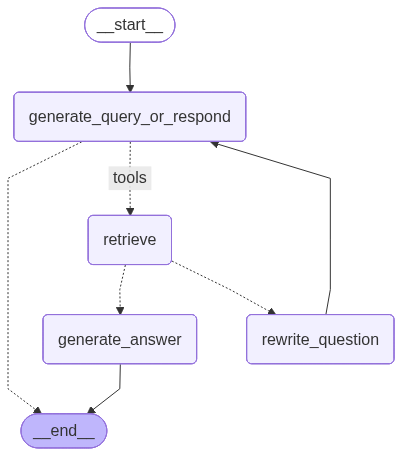

In [48]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))


## 8. Run the agentic RAG
Now let’s test the complete graph by running it with a question:


In [49]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "What tasks are included in the user registration story?",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node:", node)
        update["messages"][-1].pretty_print()
        print("\n\n")


Update from node: generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_user_stories (call_shSqNOHkJfPGbl0Fa33MWOro)
 Call ID: call_shSqNOHkJfPGbl0Fa33MWOro
  Args:
    query: user registration



Update from node: retrieve
================================= Tool Message =================================
Name: retrieve_user_stories

User Story: User registration
Description: AS A STUDENT I WANT TO BE ABLE TO REGISTER INTO THE SYSTEM TO MANAGE MY PROFILE AND MY STUDY GROUPS.
Status: New
Story Points: {'9229632': 18384390, '9229633': 18384390, '9229634': 18384390, '9229635': 18384396}
Total Story Points: 8,0
Sprint Order: 6.0
Created: 2024-02-25T13:11:03.029Z
Finished: nan
Assigned Users: 626629.0

Tasks:
- Task: Design of the graphic interface
  Status: Closed
  Assignee: 626629.0
  Created: 2024-03-06T19:15:11.111Z
  Due: nan
  Finished: 2024-03-17T11:59:45.889Z
  Estimated effort: 3.0
  Actual effort: N/A
- Tas

## 8. Add conversational memory to the graph using MemorySaver

Enable conversation memory persistence for multi-turn interactions.

In [50]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

graph = workflow.compile(checkpointer=memory)

## 9. Interactive chatbot interface with memory-enabled Agentic RAG graph

Launch an interactive chat session with memory and real-time graph execution.

In [51]:
import builtins
from langchain_core.messages import HumanMessage

def start_chatbot(thread_id: str = "taiga-thread-1", show_tool_output: bool = True, tool_preview_chars: int = 1200):
    print("Hi! I'm your Agile Task-Management assistant for Taiga user stories.")
    print("Ask me about tasks, effort (estimated vs actual), assignees, story points, sprint order, or status.")
    print("Type 'exit' to quit.\n")

    config = {"configurable": {"thread_id": thread_id}}

    while True:
        user_input = builtins.input("You: ").strip()
        if user_input.lower() in {"exit", "quit"}:
            print("Goodbye! Good luck with your project.")
            break

        # Stream through the graph (keeps chat history via MemorySaver + thread_id)
        for step in graph.stream(
            {"messages": [HumanMessage(content=user_input)]},
            stream_mode="values",
            config=config,
        ):
            last_msg = step["messages"][-1]
            msg_type = getattr(last_msg, "type", None)

            # 1) Show tool output (retrieved context)
            if msg_type == "tool":
                if show_tool_output:
                    print("\n Tool Output (retrieved context):")
                    content = last_msg.content or ""
                    if len(content) > tool_preview_chars:
                        print(content[:tool_preview_chars] + "\n... [truncated]")
                    else:
                        print(content)
                continue

            # 2) Show assistant messages (including tool calls)
            if msg_type == "ai":
                # If the AI message contains tool calls, label it clearly
                if getattr(last_msg, "tool_calls", None):
                    print("\n Assistant decided to call a tool:")
                else:
                    print("\n Assistant:")

                last_msg.pretty_print()
                continue

            # 3) Show any other message types (human/system) if they appear
            print("\n Message:")
            last_msg.pretty_print()

        print("\n Next question? (or type 'exit' to quit)\n")

In [52]:
start_chatbot(show_tool_output=True, tool_preview_chars=600)

Hi! I'm your Agile Task-Management assistant for Taiga user stories.
Ask me about tasks, effort (estimated vs actual), assignees, story points, sprint order, or status.
Type 'exit' to quit.

You: Hi

 Message:
================================ Human Message =================================

Hi

 Assistant:
================================== Ai Message ==================================

Hello! How can I assist you with your Taiga project data today?

 Next question? (or type 'exit' to quit)

You: What is the total story points and sprint order of the "User login" user story?

 Message:
================================ Human Message =================================

What is the total story points and sprint order of the "User login" user story?

 Assistant decided to call a tool:
================================== Ai Message ==================================
Tool Calls:
  retrieve_user_stories (call_bi1nrz5Bredjx2rceE1kvMFm)
 Call ID: call_bi1nrz5Bredjx2rceE1kvMFm
  Args:
    query: U